# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
link = "http://api.openweathermap.org/data/2.5/weather?"
link =f"{link}appid={api_key}&units=metric&q="

#set up lists hold data
location =[]
clouds = []
country = []
date = []
humidity = []
lats = []
lngs = []
max_temp = []
wind = []

#set organizational variables
count = 0
current_set = 1

#collect data and store in lists
print("Beginning Data Retrieval\n-----------------------------")
for city in cities:
   try:
       data = requests.get(link+city).json()
       location.append(data["name"])
       clouds.append(data["clouds"]["all"])
       country.append(data["sys"]["country"])
       date.append(datetime.date.fromtimestamp(data["dt"]))
       humidity.append(data["main"]["humidity"])
       lats.append(data["coord"]["lat"])
       lngs.append(data["coord"]["lon"])
       max_temp.append(data["main"]["temp_max"])
       wind.append(data["wind"]["speed"])
       if count > 49:
           count = 1
           current_set += 1
       else:
           count += 1
       print(f"Processing record {count} of set {current_set} | {city}")
   except Exception:
       print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")




Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing record 1 of set 1 | rikitea
Processing record 2 of set 1 | poiana
Processing record 3 of set 1 | kaitangata
Processing record 4 of set 1 | mar del plata
Processing record 5 of set 1 | talnakh
Processing record 6 of set 1 | arraial do cabo
Processing record 7 of set 1 | albany
Processing record 8 of set 1 | kodiak
Processing record 9 of set 1 | port hardy
City not found. Skipping...
Processing record 10 of set 1 | provideniya
Processing record 11 of set 1 | pionki
Processing record 12 of set 1 | novosergiyevka
City not found. Skipping...
Processing record 13 of set 1 | mgandu
Processing record 14 of set 1 | bom jesus
Processing record 15 of set 1 | ushuaia
Processing record 16 of set 1 | hilo
Processing record 17 of set 1 | bathsheba
Processing record 18 of set 1 | fairbanks
Processing record 19 of set 1 | barcelos
City not found. Skipping...
Processing record 20 of set 1 | sorong
Processing re

Processing record 33 of set 4 | podor
Processing record 34 of set 4 | imbituba
Processing record 35 of set 4 | mareeba
Processing record 36 of set 4 | bluff
Processing record 37 of set 4 | cleethorpes
Processing record 38 of set 4 | morondava
Processing record 39 of set 4 | porbandar
Processing record 40 of set 4 | nara
Processing record 41 of set 4 | avera
Processing record 42 of set 4 | aras
City not found. Skipping...
City not found. Skipping...
Processing record 43 of set 4 | gaoua
City not found. Skipping...
Processing record 44 of set 4 | mineiros
Processing record 45 of set 4 | bilma
Processing record 46 of set 4 | barrow
Processing record 47 of set 4 | hargeysa
City not found. Skipping...
Processing record 48 of set 4 | gizo
Processing record 49 of set 4 | varkkallai
Processing record 50 of set 4 | rio grande
Processing record 1 of set 5 | zambezi
Processing record 2 of set 5 | gorizia
Processing record 3 of set 5 | linqiong
Processing record 4 of set 5 | rizhao
City not found.

Processing record 22 of set 8 | verdun
City not found. Skipping...
Processing record 23 of set 8 | mecca
Processing record 24 of set 8 | taman
Processing record 25 of set 8 | dowa
Processing record 26 of set 8 | gilbues
Processing record 27 of set 8 | pokhara
Processing record 28 of set 8 | macaiba
Processing record 29 of set 8 | stonewall
Processing record 30 of set 8 | pavlivka
Processing record 31 of set 8 | haines junction
Processing record 32 of set 8 | pacific grove
Processing record 33 of set 8 | tocopilla
Processing record 34 of set 8 | sorland
Processing record 35 of set 8 | lazaro cardenas
Processing record 36 of set 8 | emba
Processing record 37 of set 8 | vao
Processing record 38 of set 8 | kibuye
Processing record 39 of set 8 | colwyn bay
Processing record 40 of set 8 | olga
Processing record 41 of set 8 | sao gabriel da cachoeira
Processing record 42 of set 8 | inuvik
Processing record 43 of set 8 | erenhot
Processing record 44 of set 8 | pahrump
Processing record 45 of s

Processing record 3 of set 12 | marabba
Processing record 4 of set 12 | payo
Processing record 5 of set 12 | flin flon
Processing record 6 of set 12 | markova
Processing record 7 of set 12 | cabedelo
Processing record 8 of set 12 | okha
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df ={"City":location,
     "Cloudiness": clouds,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Latitude": lats,
     "Longitude":lngs,
     "Max Temperature": max_temp,
     "Wind Speed": wind,
}
#convert to dataframe
df = pd.DataFrame(df)
df.count()

City               558
Cloudiness         558
Country            558
Date               558
Humidity           558
Latitude           558
Longitude          558
Max Temperature    558
Wind Speed         558
dtype: int64

In [5]:
df.to_csv("_data/weather_data.csv")
df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Rikitea,39,PF,2019-09-26,71,-23.12,-134.97,22.14,4.70
1,Poiana,2,RO,2019-09-26,96,44.69,22.98,8.54,2.99
2,Kaitangata,45,NZ,2019-09-26,53,-46.28,169.85,14.44,6.71
3,Mar del Plata,100,AR,2019-09-26,43,-46.43,-67.52,12.84,7.65
4,Talnakh,0,RU,2019-09-26,86,69.49,88.39,1.00,4.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

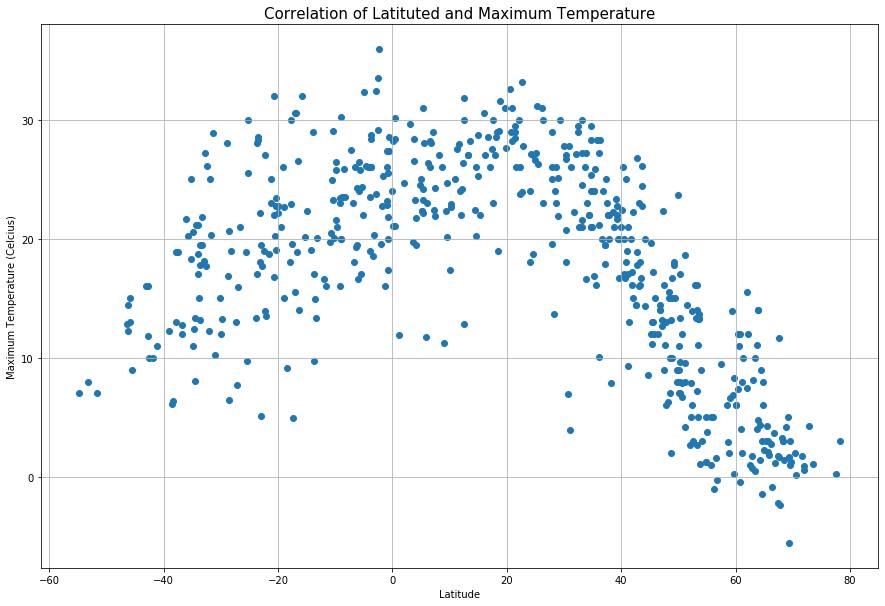

In [6]:
#create a plot based on latitude and max temp
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x=df["Latitude"], y=df["Max Temperature"])
#label graph
plt.title("Correlation of Latituted and Maximum Temperature", size=15)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (Celcius)")
plt.grid()
#save as png
plt.savefig("_data/temp_scatter")

#### Latitude vs. Humidity Plot

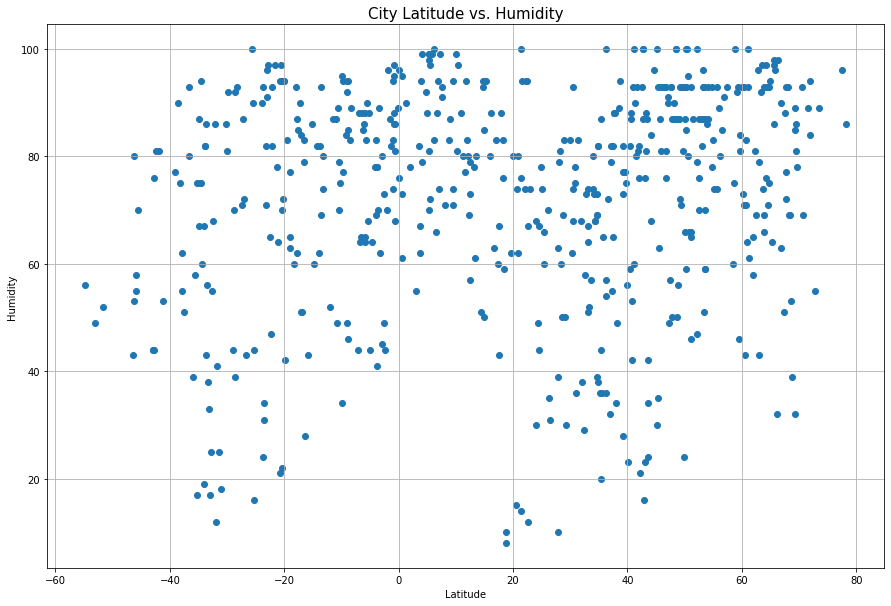

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x=df["Latitude"], y=df["Humidity"])
#label graph
plt.title("City Latitude vs. Humidity", size=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
#save as png
plt.savefig("_data/humidity_scatter")

#### Latitude vs. Cloudiness Plot

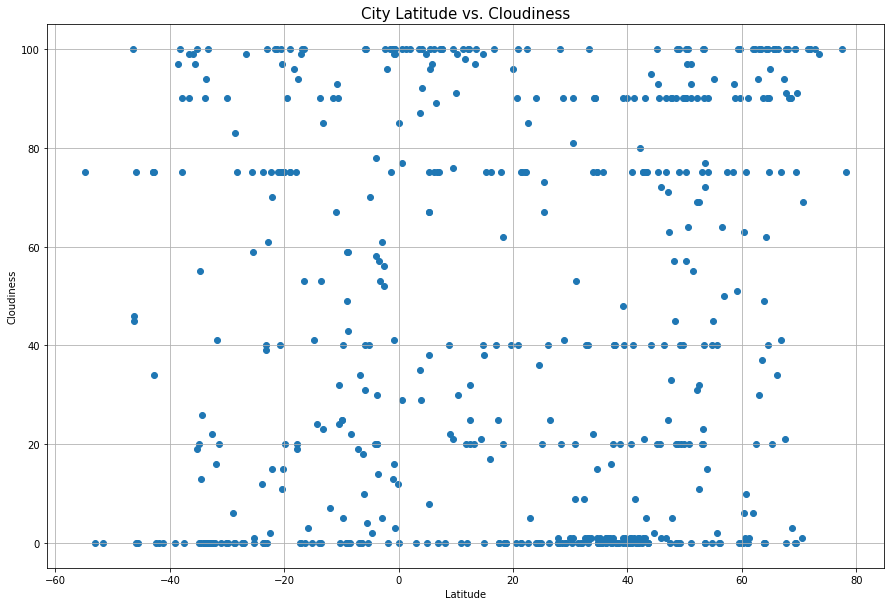

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x=df["Latitude"], y=df["Cloudiness"])
#label graph
plt.title("City Latitude vs. Cloudiness", size=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
#save as png
plt.savefig("_data/cloudiness_scatter")

#### Latitude vs. Wind Speed Plot

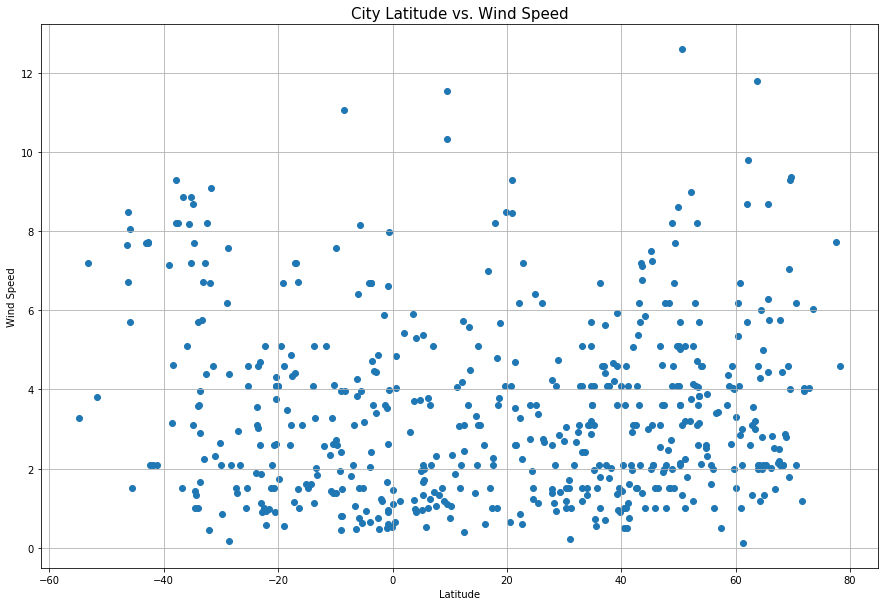

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x=df["Latitude"], y=df["Wind Speed"])
#label graph
plt.title("City Latitude vs. Wind Speed", size=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
#save as png
plt.savefig("_data/wind_scatter")

According to the data provided above a few trends are observed:
*Latitude impacts the data results.

*The highest temperatures are seen more near the equator and are decreasing going north and south of equator. 

*City Latitude vs. Humidity graph indicates that there is not a strong pattern observed, humidity is randomly dispersed. However there is a slightly larger cluster of northern hemisphere cities with high humidity (above 60% humidity).

*There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities near 0, 80, and 90% cloudiness.

*There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.
